# Predicting Concrete Strength

## 📖 Background

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives.

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals.

## 🔎 Objective

* To find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.


## 💾 Data Summary

* "cement" - Portland cement in kg/m3

* "slag" - Blast furnace slag in kg/m3

* "fly_ash" - Fly ash in kg/m3

* "water" - Water in liters/m3

* "superplasticizer" - Superplasticizer additive in kg/m3

* "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3

* "fine_aggregate" - Fine aggregate (sand) in kg/m3

* "age" - Age of the sample in days

* "strength" - Concrete compressive strength in megapascals (MPa)

## 🛬 Approach 

   ✔️**Supervised Learning**

   ✔️**Regression**
   
   ✔️**Multivariate Regression**




## Import All Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold ,cross_val_score
from sklearn.model_selection import GridSearchCV

## Load Data

In [2]:
df = pd.read_csv("./data/concrete_data.csv")
df

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


✔️Our data set have:

  * 1030 rows

  * 9 columns

✔️Strength is the target column that we have to predict

### Task 1 - Is there any Nan values in our dataset ?

In [3]:
df.isna().sum()

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

✔️ There are no null values in data set

### Task 2 - What type of data type in the columns ?  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


✔️ All columns are numerical dtype

### Task 3 - Descriptive Stastistics 

In [5]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Task 4 - Plot distribution of all variables

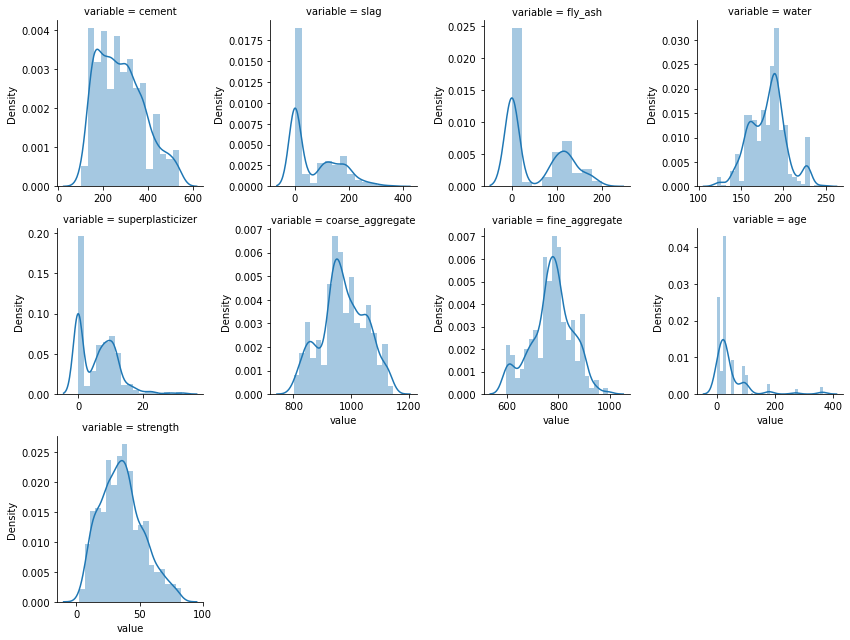

In [6]:
nd = pd.melt(df)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1;

    ✔️ Some of the variables are right skewed so we need to transform them
    ✔️ Some Variable are normaly distributed

### Task 5 - Plot a box plot 

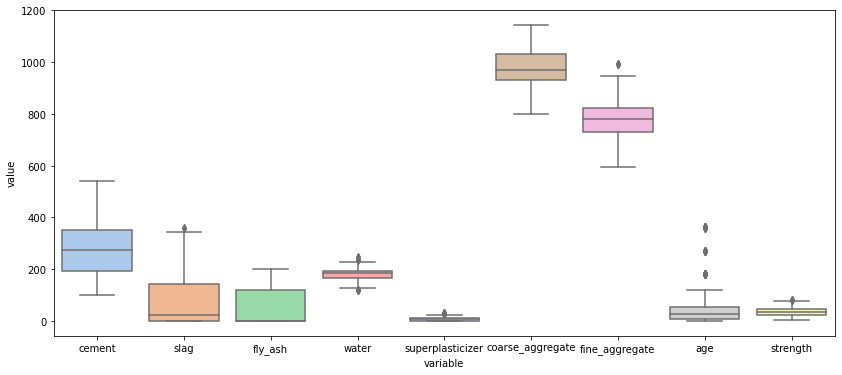

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x="variable",y="value",data=pd.melt(df),palette="pastel");

    ✔️ Our data is having very few outlier 
    ✔️ No outlier in the target column

### Task 6 - Correlation Between different variables

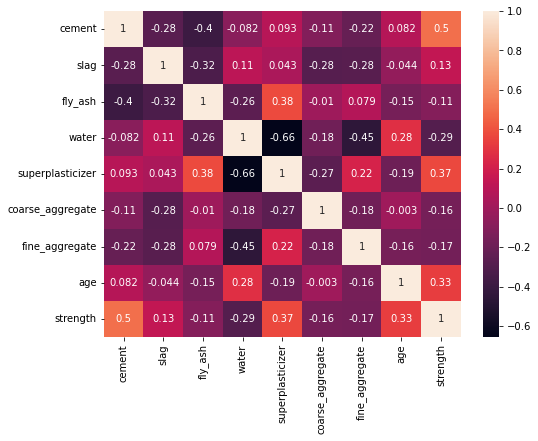

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True);

### Task 7 : Scatter Plot between cement and fly_ash

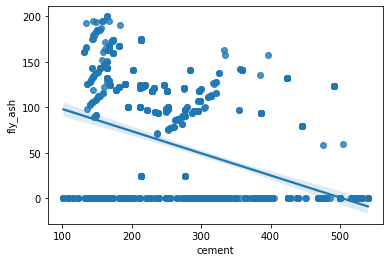

In [9]:
sns.regplot(x="cement",y="fly_ash",data=df);

    ✔️ We do not infer much from the graph.
    ✔️ fly_ash has many values zero

### Task 8 : Regplot Plot between cement and strength

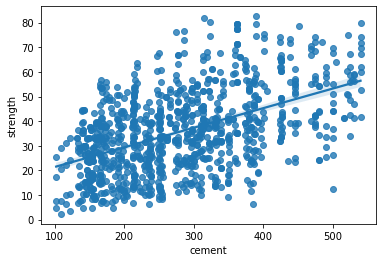

In [10]:
sns.regplot(x="cement",y="strength",data=df);

    ✔️ Linearity between two variable can be seen from the graph
    ✔️ One value of x has many value of y
    ✔️ Linear regression cannot be very significant.

### Task 9 : Regplot Plot between water and superplasticizer

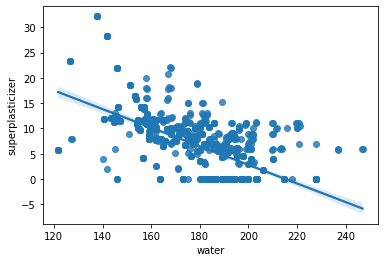

In [11]:
sns.regplot(x="water",y="superplasticizer",data=df);

✔️ Linear Regression can be significant

### Task 10 - Plot a Pairlot to determine any relationship between target and other variables.

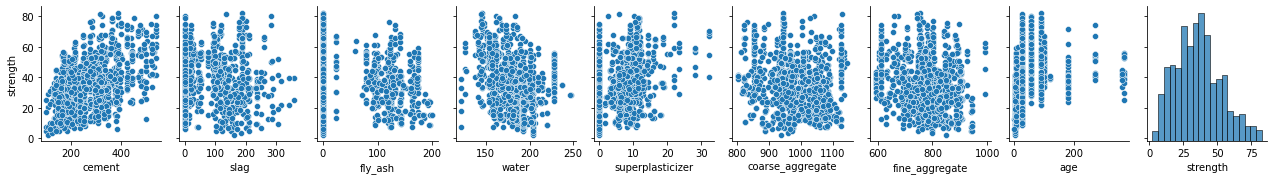

In [12]:
sns.pairplot(df,y_vars=['strength'],aspect=0.8);

## Data Preprocessing : Preparing Data for ML Modelling

### Input and Target columns

In [13]:
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

In [14]:
input_cols = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer','coarse_aggregate', 'fine_aggregate', 'age',]
target_col = ['strength']

In [15]:
X = df[input_cols].copy()
Y = df[target_col].copy()

In [16]:
print("Columns in X:",list(X.columns)) 

Columns in X: ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']


In [17]:
print("Length of X:",len(X))
print("Length of y:",len(Y))

Length of X: 1030
Length of y: 1030


### Split data into train and test 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [19]:
print("Num of rows in X_train:",len(X_train))
print("Num of rows in y_train:",len(y_train))


Num of rows in X_train: 824
Num of rows in y_train: 824


In [20]:
print("Num of rows in X_test:",len(X_test))
print("Num of rows in y_test:",len(y_test))

Num of rows in X_test: 206
Num of rows in y_test: 206


### Scaling Numerical Data

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train[input_cols] = scaler.transform(X_train[input_cols])
X_test[input_cols] = scaler.transform(X_test[input_cols])

## Training a Multiple Linear Regression Model

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr.intercept_

array([35.56722825])

In [27]:
lr.coef_

array([[13.26336277, 10.0119019 ,  6.2116198 , -2.20043197,  2.02486113,
         2.18677885,  2.4860337 ,  7.34514752]])

### Model Evauation

In [28]:
print("Model R^2 on train data",lr.score(X_train,y_train))
print("Model R^2 on test data",lr.score(X_test,y_test))

Model R^2 on train data 0.6352107216919325
Model R^2 on test data 0.5178233675694148


    ✔️ Our Linear Regressin Model 63% significant on train data
    
    ✔️ Our Linear Regressin Model 51.7% significant on test data

In [29]:
print("Model RMSE on train",mean_squared_error(y_train, lr.predict(X_train), squared=False))
print("Model RMSE on test",mean_squared_error(y_test, lr.predict(X_test), squared=False))

Model RMSE on train 10.156538165252204
Model RMSE on test 11.232508637233662


Let's compare our prediction on test data with real data

In [30]:
pred1=lr.predict(X_test)

    ✔️ Linear Regression is underfitting the data
    ✔️ We need to use some more powerfull algorithm network

## Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)

PolynomialFeatures()

In [32]:
x_train_poly = poly_reg.transform(X_train)
x_test_poly = poly_reg.transform(X_test)

In [33]:
lr_poly = LinearRegression()

In [34]:
lr_poly.fit(x_train_poly,y_train)

LinearRegression()

### Model Evaluation

In [35]:
print("Model Score on train data",lr_poly.score(x_train_poly,y_train))
print("Model Score on test data",lr_poly.score(x_test_poly,y_test))

Model Score on train data 0.8233041927645691
Model Score on test data 0.7341134832924039


In [36]:
print("Model RMSE on train",mean_squared_error(y_train, lr_poly.predict(x_train_poly), squared=False))
print("Model RMSE on test",mean_squared_error(y_test, lr_poly.predict(x_test_poly), squared=False))

Model RMSE on train 7.068671419280147
Model RMSE on test 8.341071398806038


### Finding best degree

In [37]:
def best_degree(degrees):
    model_scores = {'Degree':[],'R^2 train':[],'R^2 test':[]}
    for d in degrees:
        poly_reg2 = PolynomialFeatures(degree=d)
        poly_reg2.fit(X_train)
        x_train_poly2 = poly_reg2.transform(X_train)
        x_test_poly2 = poly_reg2.transform(X_test)
        lr_poly2 = LinearRegression()
        lr_poly2.fit(x_train_poly2,y_train)
        model_scores['Degree'].append(d)
        model_scores['R^2 train'].append(lr_poly2.score(x_train_poly2,y_train))
        model_scores['R^2 test'].append(lr_poly2.score(x_test_poly2,y_test))
    return pd.DataFrame(model_scores)
    

In [38]:
degrees=list(range(1,7))
degrees

[1, 2, 3, 4, 5, 6]

In [39]:
score = best_degree(degrees)

In [40]:
score

,Degree,R^2 train,R^2 test
0,1,0.635211,5.178234e-01
1,2,0.823304,7.341135e-01
2,3,0.932308,8.176450e-01
3,4,0.984346,-2.356218e+01
4,5,0.994040,-2.494687e+18
5,6,0.997536,-1.523774e+07


    ✔️ We can see that best degree is 3 have high score on train and test data

    ✔️ Let's evaluate it using cross validation


### 3 degree Polynomial Model Cross Validation 

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
poly_reg3 = PolynomialFeatures(degree=3)
poly_reg3.fit(X_train)
x_train_poly3 = poly_reg3.transform(X_train)
x_test_poly3 = poly_reg3.transform(X_test)
lr_poly3 = LinearRegression()

In [43]:
mse = cross_val_score(lr_poly3,x_train_poly3,y_train,cv=4,scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)

In [44]:
np.average(rmse)

7.841049412117878

    ✔️  Avg RMSE with cross_val is 8.45 and on splitted test data 8.34
    ✔️  So we can say that our model is already regulirized
    ✔️  Training a 3 Degree polynomial Model
    

In [45]:
lr_poly3.fit(x_train_poly3,y_train)

LinearRegression()

### Model Evaluation

In [46]:
print("Model Score on train data",lr_poly3.score(x_train_poly3,y_train))
print("Model Score on test data",lr_poly3.score(x_test_poly3,y_test))
print('- - - - - - - -- - - - - - - --  - - - - - - - -')
print("Model RMSE on train",mean_squared_error(y_train, lr_poly3.predict(x_train_poly3), squared=False))
print("Model RMSE on test",mean_squared_error(y_test, lr_poly3.predict(x_test_poly3), squared=False))

Model Score on train data 0.9323077029175969
Model Score on test data 0.8176449735099944
- - - - - - - -- - - - - - - --  - - - - - - - -
Model RMSE on train 4.375163608660498
Model RMSE on test 6.907685413220052


In [47]:
poly_preds = lr_poly3.predict(x_test_poly3)

In [48]:
comp = pd.DataFrame(poly_preds,columns=['Predicted']) 
comp["True"] = np.array(y_test.iloc[:,0])

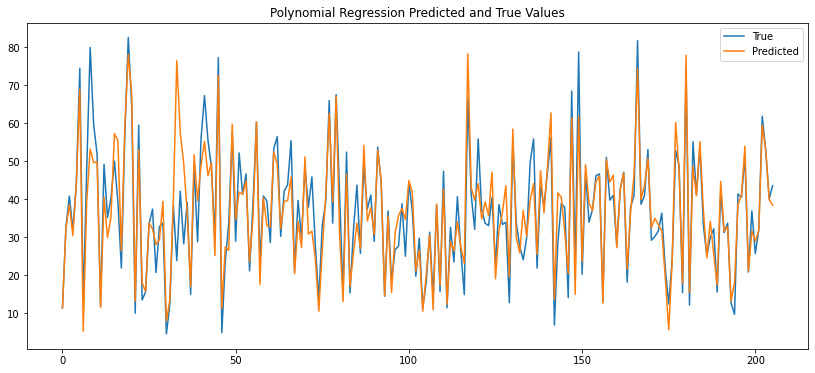

In [49]:
plt.figure(figsize=(14,6))
plt.plot(comp["True"])
plt.plot(comp["Predicted"])
plt.legend(['True','Predicted'])
plt.title("Polynomial Regression Predicted and True Values");

    ✔️  Our Prediction are not very near to true value
    ✔️  It can be a optimal solution
    ✔️  It is overfittingb the training data
    ✔️  We will generalize polynomial regression using Ridge Regression 

## Training a Polynomial Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge_reg = Ridge(alpha=1,solver="cholesky")

In [52]:
ridge_reg.fit(x_train_poly3,y_train)

Ridge(alpha=1, solver='cholesky')

### Model Evaluation

In [53]:
print("Model Score on train data",ridge_reg.score(x_train_poly3,y_train))
print("Model Score on test data",ridge_reg.score(x_test_poly3,y_test))
print('- - - - - - - -- - - - - - - --  - - - - - - - -')
print("Model RMSE on train",mean_squared_error(y_train, ridge_reg.predict(x_train_poly3), squared=False))
print("Model RMSE on test",mean_squared_error(y_test, ridge_reg.predict(x_test_poly3), squared=False))

Model Score on train data 0.9265311611672842
Model Score on test data 0.8630546857168448
- - - - - - - -- - - - - - - --  - - - - - - - -
Model RMSE on train 4.55802035309441
Model RMSE on test 5.986145518557627


        ✔️ Great, Ridge regression genralised polynomial regression model
        ✔️ RMSE on train and test having very less difference
        ✔️ Let's find best hyperparameter for better model

### Hyperparameter Tunning Ridge Model

In [54]:
ridge_reg1 = Ridge(random_state=42)

In [55]:
parameters = {'alpha':(0,1,0.2,0.4,0.6,0.8,0.9,1,2,3,4,5), 
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
              'positive':[True,False]
              }
ridge_cv = GridSearchCV(ridge_reg1, parameters, verbose=1, cv=3,)

In [56]:
ridge_cv.fit(x_train_poly3,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42),
             param_grid={'alpha': (0, 1, 0.2, 0.4, 0.6, 0.8, 0.9, 1, 2, 3, 4,
                                   5),
                         'positive': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=1)

In [57]:
ridge_cv.best_score_

0.8449468743465692

In [58]:
ridge_cv.best_params_

{'alpha': 3, 'positive': False, 'solver': 'auto'}

In [59]:
ridge_cv.scorer_(ridge_cv.best_estimator_,x_test_poly3,y_test)

0.8668827149563388

In [60]:
best_ridge = ridge_cv.best_estimator_

In [61]:
best_ridge.score(x_test_poly3,y_test)

0.8668827149563388

In [62]:
print("Model Score on train data",best_ridge.score(x_train_poly3,y_train))
print("Model Score on test data",best_ridge.score(x_test_poly3,y_test))
print('- - - - - - - -- - - - - - - --  - - - - - - - -')
print("Model RMSE on train",mean_squared_error(y_train, best_ridge.predict(x_train_poly3), squared=False))
print("Model RMSE on test",mean_squared_error(y_test, best_ridge.predict(x_test_poly3), squared=False))

Model Score on train data 0.9221860333334354
Model Score on test data 0.8668827149563388
- - - - - - - -- - - - - - - --  - - - - - - - -
Model RMSE on train 4.690870563007377
Model RMSE on test 5.901887233325285


        ✔️ Great, We have Regularized our model to the best
        ✔️ We see a little improvement as compared to previous model

#### Lets Compare Predicted and True Vale

In [63]:
preds_ridge = best_ridge.predict(x_test_poly3)
comp_ridge =  pd.DataFrame(preds_ridge,columns=['Predicted']) 
comp_ridge["True"] = np.array(y_test.iloc[:,0])

In [64]:
comp_ridge

,Predicted,True
0,11.746134,11.465986
1,30.800045,32.660478
2,37.802924,40.858348
3,30.947707,31.899986
4,42.197359,44.209201
...,...,...
201,31.776846,32.068218
202,63.944648,61.887366
203,48.462385,52.908320
204,39.945847,40.148187


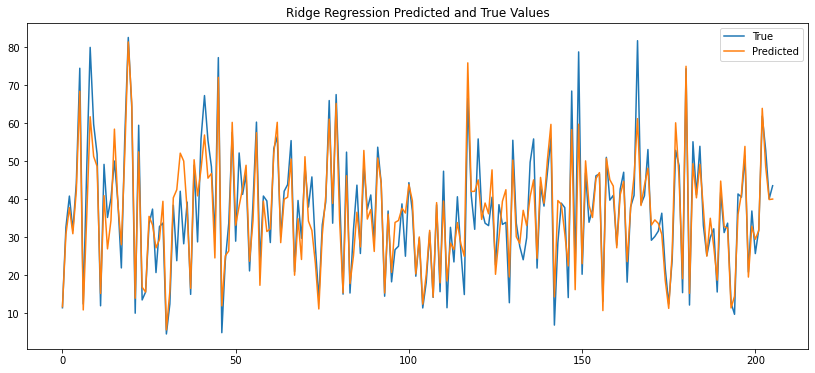

In [65]:
plt.figure(figsize=(14,6))
plt.plot(comp_ridge["True"])
plt.plot(comp_ridge["Predicted"])
plt.legend(['True','Predicted'])
plt.title("Ridge Regression Predicted and True Values");

### Save Our Model

In [66]:
import joblib

In [67]:
cement_strength ={
    'input_col':input_cols,
    'output_col':target_col,
    'Scaler':scaler,
    '3Degree_Transform':poly_reg3,
    'ridge':best_ridge}

In [68]:
joblib.dump(cement_strength, 'cement_strength.joblib')

['cement_strength.joblib']

### Prediction with individual data

In [69]:
def ridge_pred(inputs_dict):
    saved = joblib.load('cement_strength.joblib')
    df=pd.DataFrame(inputs_dict)
    scaled = saved['Scaler'].transform(df)
    poly_tf = saved['3Degree_Transform'].transform(scaled)
    pred = saved['ridge'].predict(poly_tf)
    print(pred)

In [70]:
input_dict = {'cement':[260.9],'slag':[100.5],'fly_ash':[78.3],'water':[200.6],'superplasticizer':[8.6],
              'coarse_aggregate':[864.5],'fine_aggregate':[761.5],'age':[28]}

In [71]:
ridge_pred(input_dict)

[[35.05456787]]


## Conclusion

       ✔️ Ridge Regression can be a optimal solution but not the best
       ✔️ Ridge Regression is still overfitting the train data
       ✔️ Train data is less then 1K Example so we cannot cannot use Random Forest Regression
       ✔️ We can use some other models like svm